In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')


In [206]:
conn =sqlite3.connect('inventory.db')
df = pd.read_sql_query("Select * from vendor_sales_summary",conn)

In [70]:
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnOver,TotalSalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


# Exploratory Data Analysis
* Previously, we examined the various tables in the database to identify key variables, understand their relationships, and determine which ones should be
included in the final analysis.
* In this phase of EDA, we will analyze the resultant table to gain insights into the distribution of each column. This will help us understand data patterns,
identify anomalies, and ensure data quality before proceeding with further analysis.

In [71]:
df.describe()

,VendorNumber,Brand,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnOver,TotalSalesToPurchaseRatio
count,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04,1.069200e+04,10692.000000,10692.000000
mean,10650.649458,18039.228769,24.385303,35.643671,847.360550,3140.886831,3.010669e+04,3077.482136,4.223907e+04,18793.783627,1774.226259,61433.763214,1.213238e+04,-inf,1.706793,2.504390
std,18753.519148,12662.187074,109.269375,148.246016,664.309212,11095.086769,1.230678e+05,10952.851391,1.676553e+05,44952.773386,10975.582240,60938.458032,4.622434e+04,NaN,6.020460,8.459067
min,2.000000,58.000000,0.360000,0.490000,50.000000,1.000000,7.100000e-01,0.000000,0.000000e+00,0.000000,0.000000,0.090000,-5.200278e+04,-inf,0.000000,0.000000
25%,3951.000000,5793.500000,6.840000,10.990000,750.000000,36.000000,4.534575e+02,33.000000,7.292200e+02,289.710000,4.800000,14069.870000,5.292000e+01,1.332451e+01,0.807229,1.153729
50%,7153.000000,18761.500000,10.455000,15.990000,750.000000,262.000000,3.655465e+03,261.000000,5.298045e+03,2857.800000,46.570000,50293.620000,1.399640e+03,3.040546e+01,0.981529,1.436894
75%,9552.000000,25514.250000,19.482500,28.990000,750.000000,1975.750000,2.073825e+04,1929.250000,2.839692e+04,16059.562500,418.650000,79528.990000,8.660200e+03,3.995613e+01,1.039342,1.665449
max,201359.000000,90631.000000,5681.810000,7499.990000,20000.000000,337660.000000,3.811252e+06,334939.000000,5.101920e+06,672819.310000,368242.800000,257032.070000,1.290668e+06,9.971666e+01,274.500000,352.928571


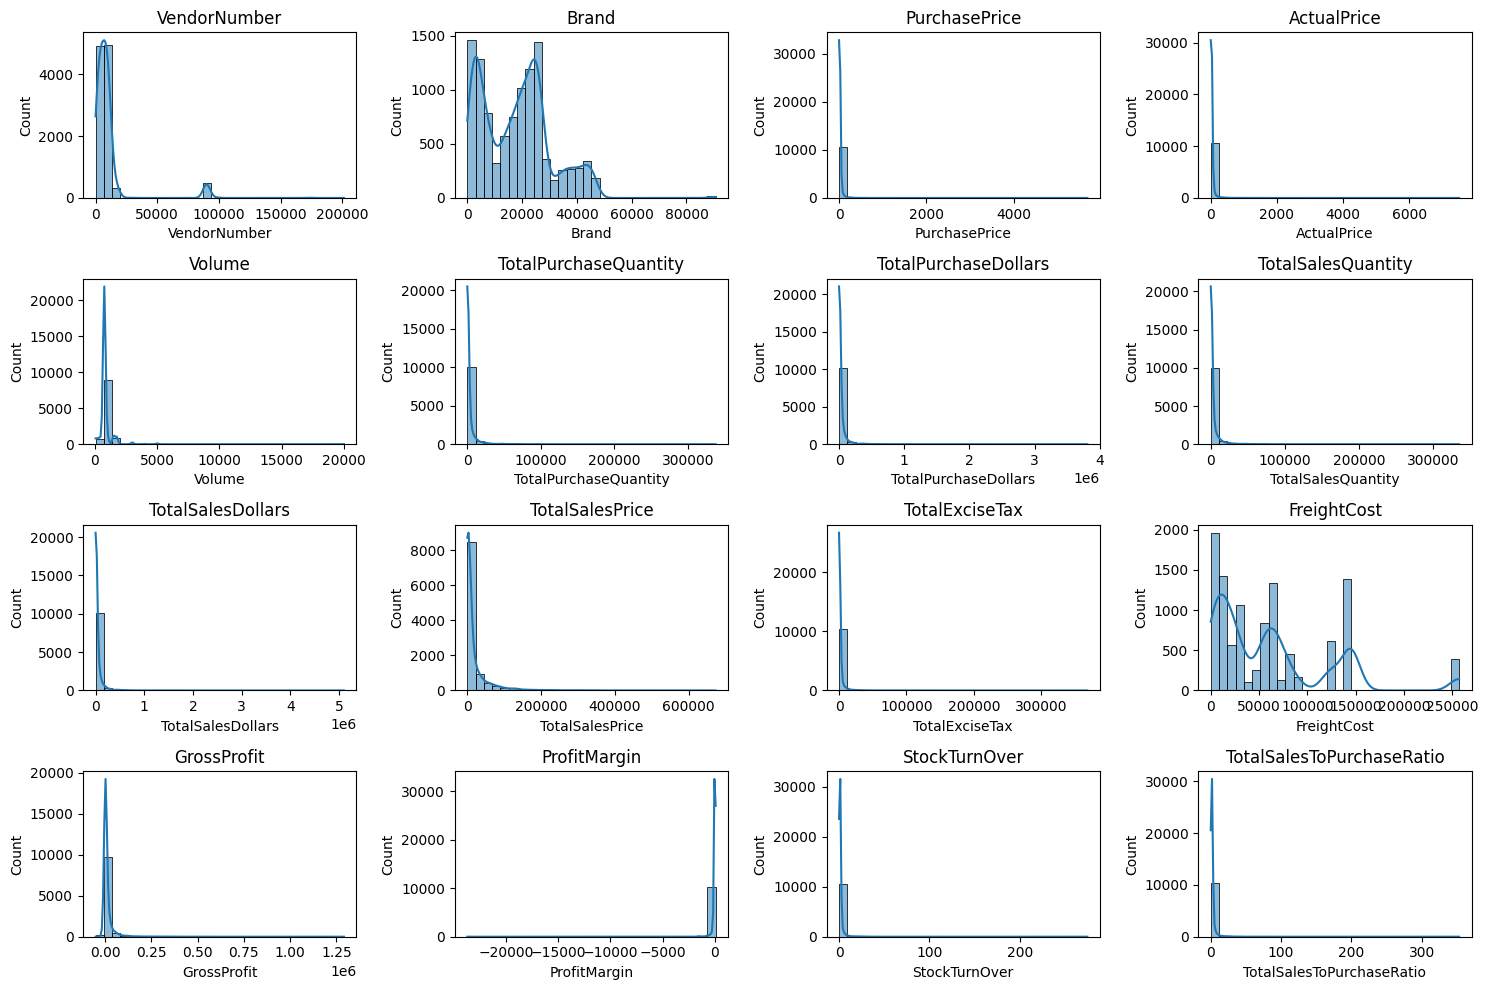

In [72]:
# Distribution Plots for Numerical Columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
# enumerate() already gives you two values index and col_names
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1) # Adjust grid layout as needed
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col) 
plt.tight_layout()
plt.show()

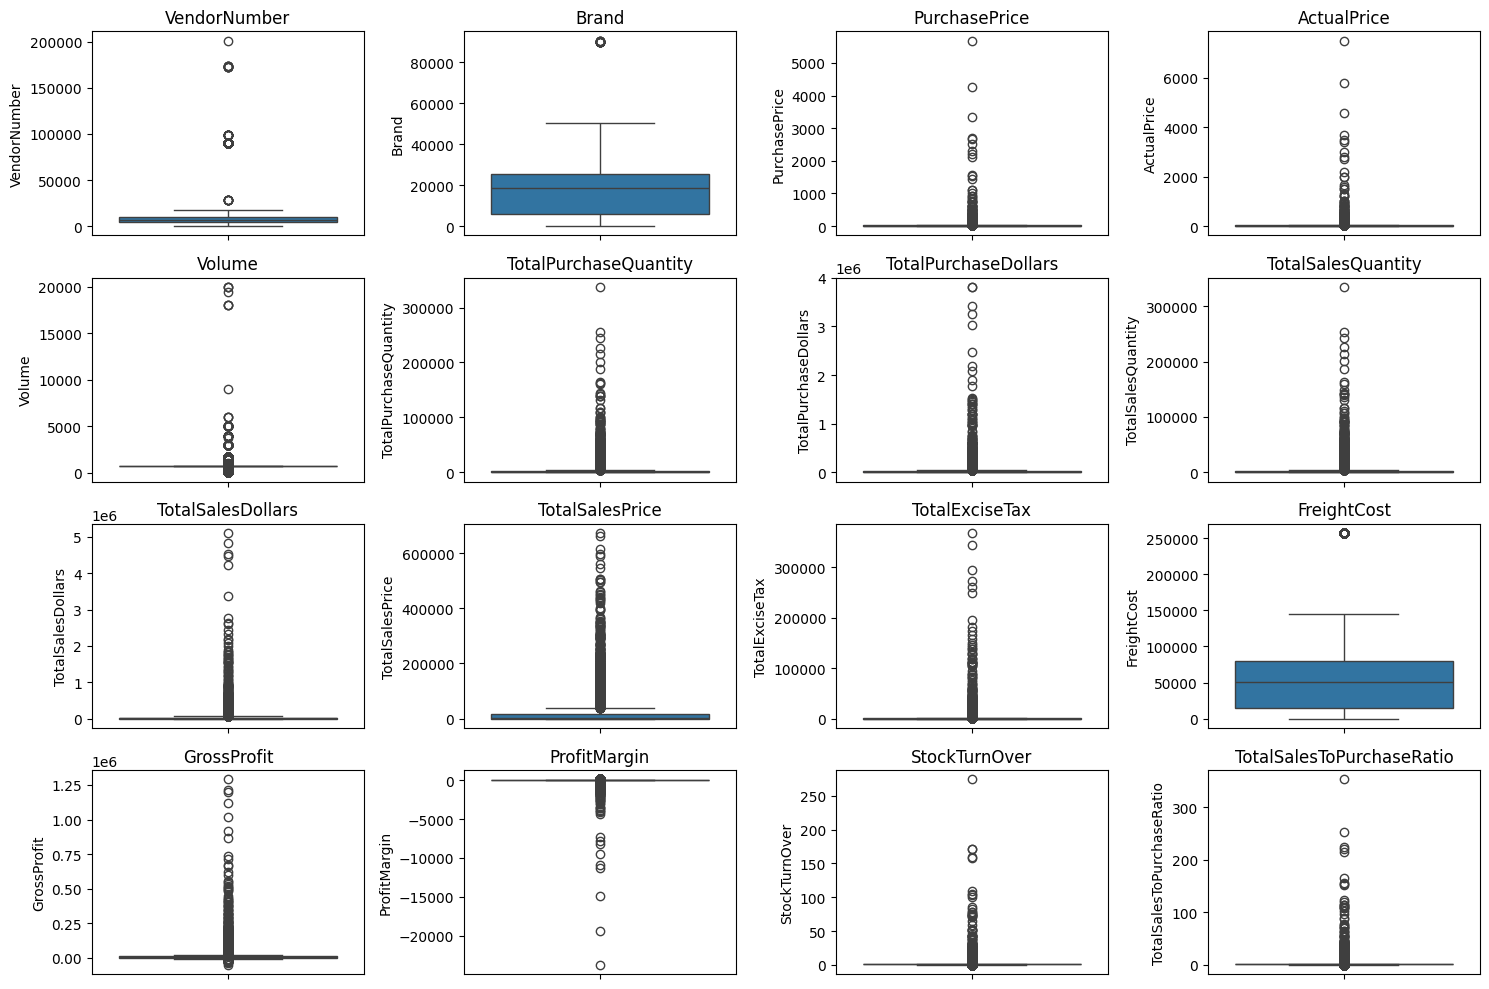

In [73]:
plt.figure(figsize=(15, 10))
# enumerate() already gives you two values index and col_names
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1) # Adjust grid layout as needed
    sns.boxplot(df[col])
    plt.title(col) 
plt.tight_layout()
plt.show()

# Summary Statistics Insights:
### Negative & Zero Values:
* Gross Profit: Minimum value is -52,002.78, indicating losses. Some products or transactions may be selling at a loss due to high costs or selling at discounts lower than the purchase price..
* Profit Margin: Has a minimum of -oo, which suggests cases where revenue is zero or even lower than costs.
* Total Sales Quantity & Sales Dollars: Minimum values are 0, meaning some products were purchased but never sold. These could be slow-moving or obsolete stock.
### Outliers Indicated by High Standard Deviations:
* Purchase & Actual Prices: The max values (5,681.81 & 7,499.99) are significantly higher than the mean (24.39 & 35.64), indicating potential premium
products.
* Freight Cost: Huge variation, from 0.09 to 257,032.07, suggests logistics inefficiencies or bulk shipments.
* Stock Turnover: Ranges from 0 to 274.5, implying some products sell extremely fast while others remain in stock indefinitely. Value more than 1 indicates that Sold quantity for that product is higher than purchased quantity due to either sales are being fulfilled from older stock.

---------------------------

In [74]:
# Removing inconsistencies
df = pd.read_sql_query("""SELECT * 
                   FROM vendor_sales_summary
                   WHERE GrossProfit>0
                       AND ProfitMargin>0
                       AND TotalSalesQuantity>0""",conn)
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnOver,TotalSalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388


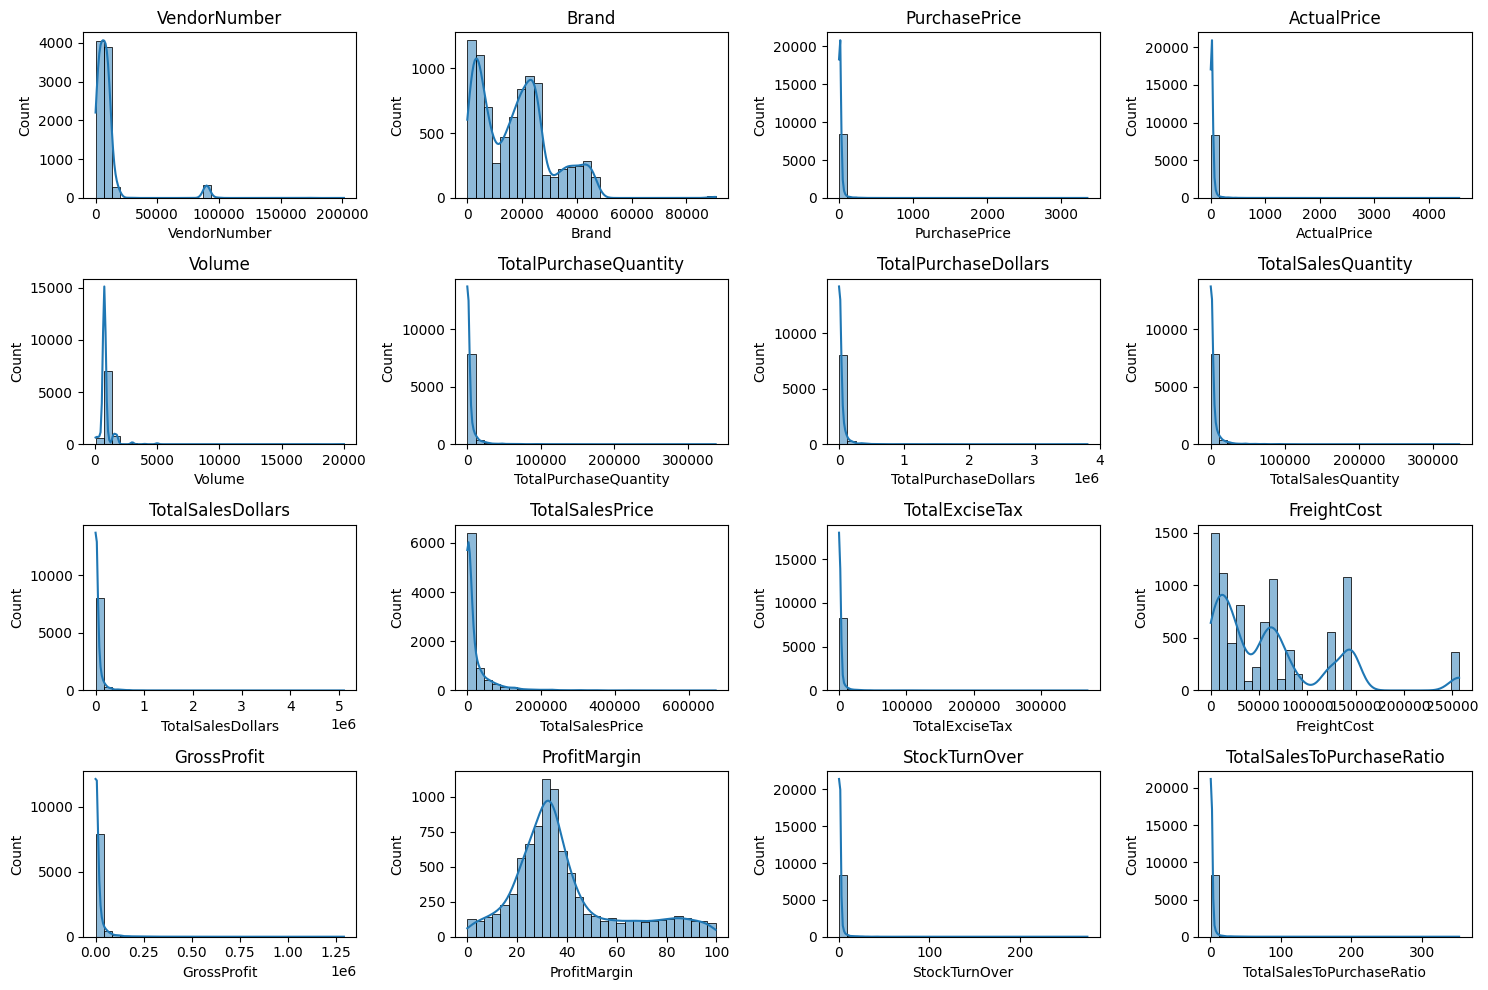

In [75]:
# plot after remving inconsistenncies
plt.figure(figsize=(15, 10))
# enumerate() already gives you two values index and col_names
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1) # Adjust grid layout as needed
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col) 
plt.tight_layout()
plt.show()

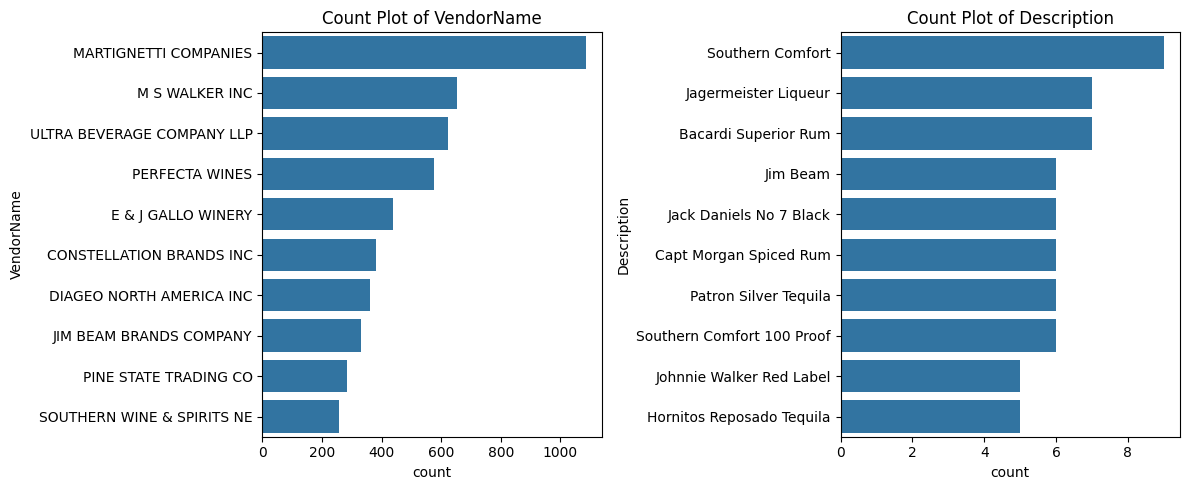

In [76]:
categorical_col = ["VendorName","Description"]

plt.figure(figsize=(12,5))
for i,col in enumerate(categorical_col):
    plt.subplot(1,2,i+1)
    sns.countplot(y=df[col], order = df[col].value_counts().index[:10]) # Top 10 categories
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()

correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot = True, fmt=".2f",cmap="coolwarm",linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

### Correlation Insights
* PurchasePrice has weak correlations with TotalSales Dollars (-0.012) and GrossProfit (-0.016), suggesting that price variations do not significantly impact
sales revenue or profit.
* Strong correlation between total purchase quantity and total sales quantity (0.999), confirming efficient inventory turnover.
* Negative correlation between profit margin & total sales price (-0.179) suggests that as sales price increases, margins decrease, possibly due to competitive
pricing pressures.
* StockTurnover has weak negative correlations with both GrossProfit (-0.038) and ProfitMargin (-0.055), indicating that faster turnover does not necessarily
result in higher profitability.

------------------------------------------------------------------------------

-------------------------------------

# DATA ANALYSIS


### 1. Identify Brands that needs Promotional or Pricig adjustment which exhibit lower sales performance but higher profit margin.

In [77]:
# reset index can be used for adding index and better format
brand_performance = df.groupby('Description').agg({'TotalSalesDollars':'sum','ProfitMargin':'mean'}).reset_index()
brand_performance

,Description,TotalSalesDollars,ProfitMargin
0,(RI) 1,21519.09,18.060661
1,.nparalleled Svgn Blanc,1094.63,29.978166
2,10 Span Cab Svgn CC,2703.89,20.937612
3,10 Span Chard CC,3325.56,27.806445
4,10 Span Pnt Gris Monterey Cy,2082.22,32.226182
...,...,...,...
7702,Zorvino Vyds Sangiovese,10579.03,29.525675
7703,Zuccardi Q Malbec,1639.18,23.981503
7704,Zum Rsl,10857.34,32.675038
7705,Zwack Liqueur,227.88,16.653502


In [78]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [79]:
np.float64(low_sales_threshold)

np.float64(560.299)

In [80]:
high_margin_threshold

np.float64(64.97017552750113)

In [81]:
target_brands = brand_performance[(brand_performance['TotalSalesDollars']<=560.299)&( brand_performance['ProfitMargin']>=64.97017552750113)]

print("Brands with Low Sales but High Profit Margin")
target_brands.sort_values('TotalSalesDollars')

Brands with Low Sales but High Profit Margin


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [82]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars'] < 10000] # for better visualization

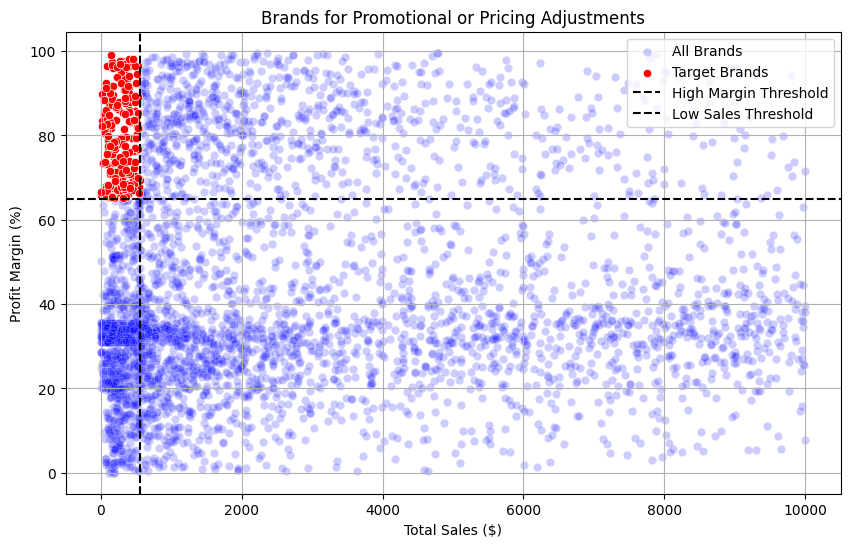

In [83]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin', color="blue", label="All Brands", alpha = 0.2)
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin', color="red", label="Target Brands")

plt.axhline(high_margin_threshold, linestyle='--', color='black', label="High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle='--', color='black', label="Low Sales Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt. legend()
plt.grid(True)
plt.show()

### 2. Which Brands and Vendors demonstrate higher sales performance

In [84]:
top_brands = df.groupby('Description')['TotalSalesDollars'].sum().nlargest(10)
top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64

In [85]:
top_vendors = df.groupby('VendorName')['TotalSalesDollars'].sum().nlargest(10)
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      67990099.42
MARTIGNETTI COMPANIES         39330359.36
PERNOD RICARD USA             32063196.19
JIM BEAM BRANDS COMPANY       31423020.46
BACARDI USA INC               24854817.14
CONSTELLATION BRANDS INC      24218745.65
E & J GALLO WINERY            18399899.46
BROWN-FORMAN CORP             18247230.65
ULTRA BEVERAGE COMPANY LLP    16502544.31
M S WALKER INC                14706458.51
Name: TotalSalesDollars, dtype: float64

In [86]:
# To convert dollars in better format
def format_dollars(value):
    if value >= 1_00_000:
        return f"{value/1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value/1_000:.2f}K"
    elif value < 1_000:
        return value
    else:
        return f"{value:.2f}"

In [87]:
top_brands.apply(lambda x : format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object

In [88]:
top_vendors.apply(lambda x : format_dollars(x))

VendorName
DIAGEO NORTH AMERICA INC      67.99M
MARTIGNETTI COMPANIES         39.33M
PERNOD RICARD USA             32.06M
JIM BEAM BRANDS COMPANY       31.42M
BACARDI USA INC               24.85M
CONSTELLATION BRANDS INC      24.22M
E & J GALLO WINERY            18.40M
BROWN-FORMAN CORP             18.25M
ULTRA BEVERAGE COMPANY LLP    16.50M
M S WALKER INC                14.71M
Name: TotalSalesDollars, dtype: object

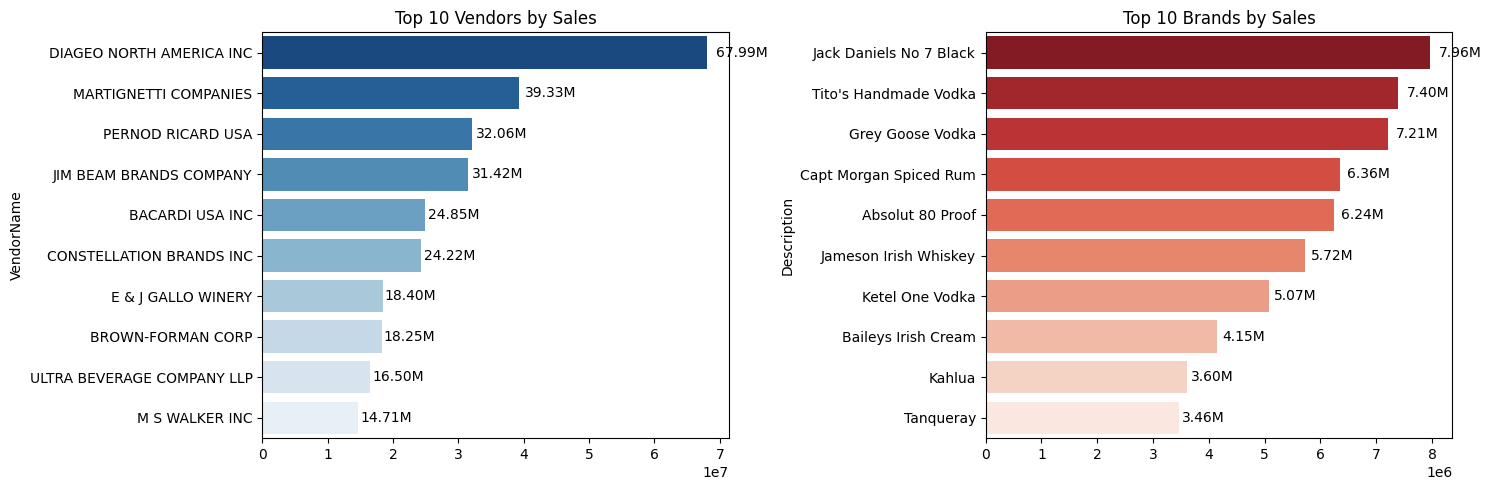

In [89]:
plt.figure(figsize=(15, 5))

# Plot for Top Vendors
plt.subplot (1, 2, 1)
ax1 = sns.barplot (y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
        bar.get_y() + bar.get_height()/2,
        format_dollars(bar.get_width()),
        ha='left', va='center', fontsize=10, color='black')

# Plot for Top Brands
plt.subplot(1, 2, 2)
ax2 = sns.barplot (y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02),
        bar.get_y()+bar.get_height() / 2,
        format_dollars (bar.get_width()),
        ha='left', va='center', fontsize=10, color='black')
plt.tight_layout()
plt.show()

### 3. Which Vendors contribute the most to total purchase dollars?

In [90]:
vendor_performance = df.groupby("VendorName").agg({"TotalPurchaseDollars":'sum',"GrossProfit":'sum',"TotalSalesDollars":'sum'}).reset_index()
vendor_performance

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars
0,ADAMBA IMPORTS INTL INC,446.16,258.37,704.53
1,ALISA CARR BEVERAGES,25698.12,78772.82,104470.94
2,ALTAMAR BRANDS LLC,11706.20,4000.61,15706.81
3,AMERICAN SPIRITS EXCHANGE,934.08,577.08,1511.16
4,AMERICAN VINTAGE BEVERAGE,104435.68,35167.85,139603.53
...,...,...,...,...
114,WEIN BAUER INC,42694.64,13522.49,56217.13
115,WESTERN SPIRITS BEVERAGE CO,298416.86,106837.97,405254.83
116,WILLIAM GRANT & SONS INC,5876538.26,1693337.94,7569876.20
117,WINE GROUP INC,5203801.17,3100242.11,8304043.28


In [91]:
vendor_performance["PurchaseContribution(%)"] = vendor_performance["TotalPurchaseDollars"]/vendor_performance["TotalPurchaseDollars"].sum()*100
vendor_performance=round(vendor_performance.sort_values("PurchaseContribution(%)",ascending=False),2)

In [92]:
# Display Top Vendors
top_vendors = vendor_performance.head(10)
top_vendors["TotalPurchaseDollars"] = top_vendors["TotalPurchaseDollars"].apply(format_dollars)
top_vendors["GrossProfit"] = round(top_vendors["GrossProfit"].apply(format_dollars),2)
top_vendors["TotalSalesDollars"] = top_vendors["TotalSalesDollars"].apply(format_dollars)

top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution(%)
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18


In [93]:
top_vendors["CumulativeContribution"]=top_vendors["PurchaseContribution(%)"].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution(%),CumulativeContribution
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30,24.60
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76,32.36
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64,40.00
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67,45.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97,50.64
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31,54.95
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63,62.51
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18,65.69


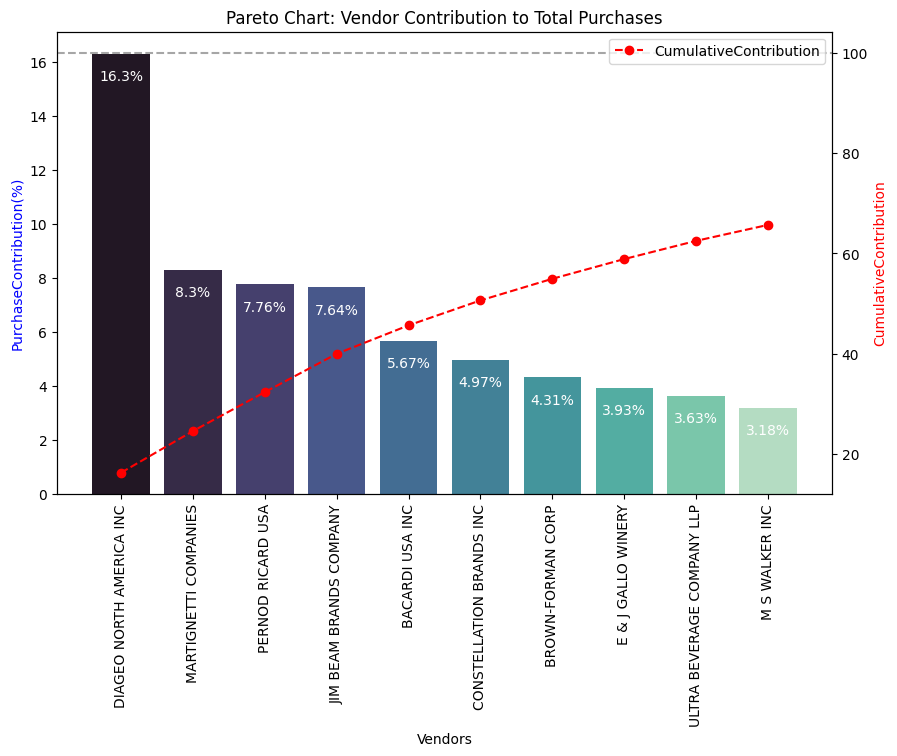

In [95]:
fig, ax1 = plt.subplots(figsize=(10, 6))
# Bar plot for Purchase Contribution%
sns.barplot(x = top_vendors['VendorName'], y = top_vendors ['PurchaseContribution(%)'], palette="mako", ax=ax1)

for i, value in enumerate (top_vendors['PurchaseContribution(%)']):
    ax1.text(i, value-1, str(value) + '%', ha='center', fontsize=10, color='white')

#Line Plot for Cumulative Contribution%
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['CumulativeContribution'], color='red', marker='o', linestyle='dashed', label='CumulativeContribution')
ax1.set_xticklabels(top_vendors ['VendorName'], rotation=90)
ax1.set_ylabel('PurchaseContribution(%)', color='blue')
ax2.set_ylabel('CumulativeContribution', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')
ax2.axhline (y=100, color='gray', linestyle= 'dashed', alpha=0.7)
ax2.legend (loc='upper right')
plt.show()

### 4. How much of total procurement is dependent on the top vendors?

In [98]:
print(f"Total purchase contribution of top 10 vendors is {round(top_vendors["PurchaseContribution(%)"].sum(),2)}")

Total purchase contribution of top 10 vendors is 65.69


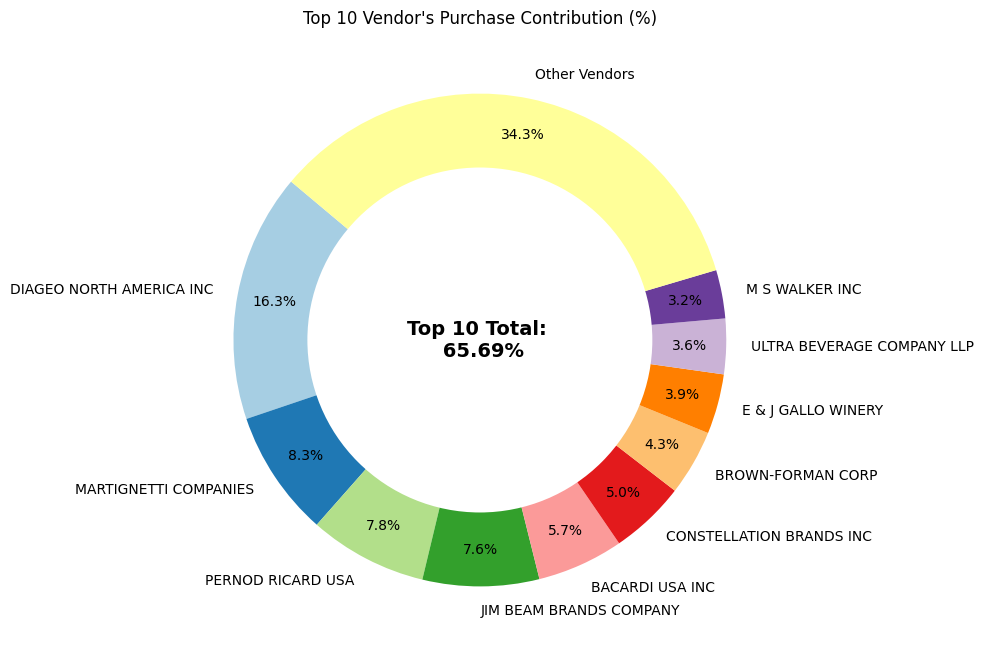

In [106]:
vendors = list(top_vendors['VendorName'].values)
purchase_contribution = list(top_vendors["PurchaseContribution(%)"].values)
total_contribution = sum(purchase_contribution)
remaining_contribution = 100 - total_contribution

# Append "Other Vendors" category
vendors.append("Other Vendors")
purchase_contribution.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots (figsize=(8, 8))

wedges, texts, autotexts = ax.pie (purchase_contribution, labels=vendors, autopct='%1.1f%%',
                                    startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)

# Draw a white circle in the center to create a "donut" effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist (centre_circle)

# Add Total Contribution annotation in the center
plt.text(0, 0, f"Top 10 Total: \n {total_contribution:.2f}%", fontsize=14, fontweight='bold', ha='center', va='center')

plt.title("Top 10 Vendor's Purchase Contribution (%)")
plt.show() 


### 5. Does prchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost savings?

In [107]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars']/ df['TotalPurchaseQuantity']

In [128]:
# added a column to divide the orders based on TotalPurchaseQuantity
df["OrderSize"] = pd.qcut(df["TotalPurchaseQuantity"], q=3, labels=["Small","Medium","Large"])

In [130]:
df.groupby("OrderSize")[["UnitPurchasePrice"]].mean()

,UnitPurchasePrice
OrderSize,
Small,39.068186
Medium,15.486414
Large,10.777625


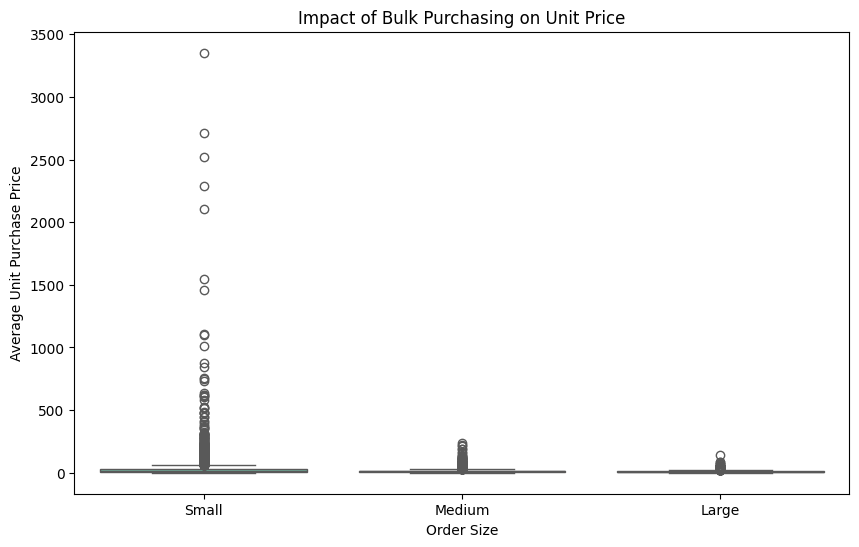

In [131]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="OrderSize", y="UnitPurchasePrice", palette="Set2")
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()

* Vendors buying in bulk (Large Order Size) get the lowest unit price ($10.78 per unit), meaning higher margins if they can manage inventory efficiently.
* The price difference between Small and Large orders is substantial (-72% reduction in unit cost)
* This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower per-unit
revenue.

### 6. Which vendors have low inventory turnover,indicating excess stock and slow -moving products?

In [136]:
# filtered vendors who have less than 1 stock turn over then applied group by
df[df["StockTurnOver"]<1].groupby("VendorName").agg({"StockTurnOver":'mean'}).sort_values("StockTurnOver")

,StockTurnOver
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
...,...
DISARONNO INTERNATIONAL LLC,0.975577
"PREMIUM PORT WINES, INC.",0.976077
TY KU LLC,0.976982


### 7. How much capital is locked in unsold inventory per vendor and which vendors contribute the most  to it?


In [180]:
df["UnsoldInventoryValue"] = (df["TotalPurchaseQuantity"]-df["TotalSalesQuantity"]) * df["PurchasePrice"]
print("Total unsold captial is",format_dollars(df["UnsoldInventoryValue"].sum()))

Total unsold captial is 2.71M


In [186]:
inventory_value_per_vendor = df.groupby("VendorName").agg({"UnsoldInventoryValue":'sum'}).reset_index().sort_values("UnsoldInventoryValue",ascending=False)
inventory_value_per_vendor["UnsoldInventoryValue"] = inventory_value_per_vendor["UnsoldInventoryValue"].apply(format_dollars)

In [187]:
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,0.72M
46,JIM BEAM BRANDS COMPANY,0.55M
68,PERNOD RICARD USA,0.47M
116,WILLIAM GRANT & SONS INC,0.40M
30,E & J GALLO WINERY,0.23M
79,SAZERAC CO INC,0.20M
11,BROWN-FORMAN CORP,0.18M
20,CONSTELLATION BRANDS INC,0.13M
61,MOET HENNESSY USA INC,0.13M
77,REMY COINTREAU USA INC,0.12M


### 8. What is 95% confidence intervals for profit margins of top-performing and low-performing vendors

In [189]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_thresjold = df["TotalSalesDollars"].quantile(0.25)

In [192]:
TopVendors = df[df["TotalSalesDollars"]>=top_threshold]["ProfitMargin"].dropna()
LowVendors = df[df["TotalSalesDollars"]<=low_thresjold]["ProfitMargin"].dropna()

In [193]:
TopVendors

0       25.297693
1       21.062810
2       24.675786
3       27.139908
4       28.412764
          ...    
3523    79.684817
3681    85.782102
4751    93.085860
4920    95.012530
5050    94.271857
Name: ProfitMargin, Length: 2141, dtype: float64

In [194]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data)) # Standard error
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

 Top Vendors 95 % CI: (30.74, 31.61), Mean: 31.18
 Low Vendors 95% CI: (40.50,  42.64), Mean: 41.57


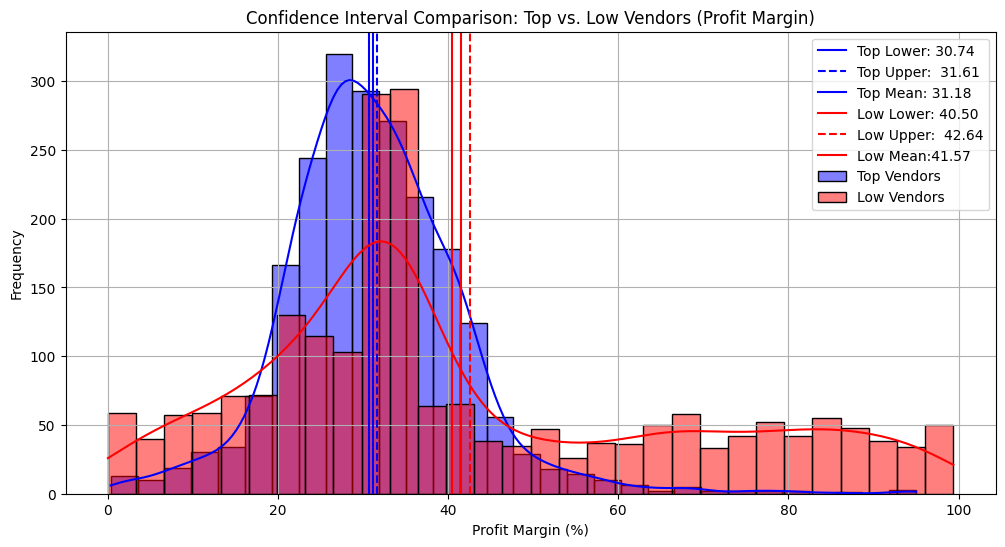

In [200]:
top_mean, top_lower, top_upper = confidence_interval(TopVendors)
low_mean, low_lower, low_upper = confidence_interval(LowVendors)

print (f" Top Vendors 95 % CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print (f" Low Vendors 95% CI: ({low_lower:.2f}, {low_upper: .2f}), Mean: {low_mean:.2f}")

plt.figure(figsize=(12, 6))

# Top Vendors Plot
sns.histplot(TopVendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="-", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper: .2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean:.2f}")

#Low Vendors Plot
sns.histplot (LowVendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="-", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper: .2f}")
plt.axvline(low_mean, color="red", linestyle="-", label= f"Low Mean:{low_mean:.2f}")

# Finalize Plot
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt. legend()
plt.grid(True)
plt.show()

* The confidence interval for low-performing vendors (40.48% to 42.62%) is significantly higher than that of top-performing vendors (30.74% to 31.61%).
* This suggests that vendors with lower sales tend to maintain higher profit margins, potentially due to premium pricing or lower operational costs.
* For High-Performing Vendors: If they aim to improve profitability, they could explore selective price adjustments, cost optimization, or bundling strategies.
* For Low-Performing Vendors: Despite higher margins, their low sales volume might indicate a need for better marketing, competitive pricing, or improved distribution strategies.

### 9. Is there a significant difference in profit margins between top-performing and low-performing vendors?
Hypothesis:
* H_0 (Null Hypothesis): There is no significant difference in the mean profit margins of top-performing and low-performing vendors.
* H_1 (Alternative Hypothesis): The mean profit margins of top-performing and low-performing vendors are significantly different.

In [205]:
top_threshold = df ["TotalSalesDollars"].quantile(0.75)
low_threshold = df ["TotalSalesDollars"].quantile(0.25)

TopVendors =  df [df ["TotalSalesDollars"] >= top_threshold] ["ProfitMargin"].dropna()
LowVendors = df [df ["TotalSalesDollars"] <= low_threshold] ["ProfitMargin"].dropna()

#Perform Two-Sample T-Test
t_stat, p_value =ttest_ind(TopVendors, LowVendors, equal_var=False)

# Print results
print (f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject H_0: There is a significant difference in profit margins between top and low-performing vendors.")
else:
    print("Fail to Reject H_0: No significant difference in profit margins.")

T-Statistic: -17.6695, P-Value: 0.0000
Reject H_0: There is a significant difference in profit margins between top and low-performing vendors.
